# 백준_14719_빗물_0407: 골드 5 (풀이: 23.04.06)
## 풀이방법
- 세 칸의 높이가 A B C 라면, B < C <= A 일 경우, B:C 칸의 높이는 모두 C가 됨.

### 1. 양 극단의 높이차 만큼 정답에 더하기
- 매 칸마다, 양쪽의 최고높이(left, right)을 구해서, 양쪽 최고 높이 중에서 최저 높이에서 현재 칸 만큼의 차이를 정답에 더한다.
```
현재 칸의 높이: 3
왼쪽에서 최고 높이: 5
오른쪽에서 최고 높이: 10
양쪽 최고 높이 중 최저 높이: 5
정답 += 5 - 3
```

### 2. 한칸씩 빗물 채우며 전진하기
- 한칸씩 전진하면서, 평탄화를 진행한다(즉 빗물을 채움)

|예제 1|예제 2|예제 3|
|:--|:--|:--|
|3 0 1 4: 답 5|3 1 2 3 4 1 1 2: 답 5|0 0 0 2 0: 답 0|
|순서대로.. <br/> 3 <br/> 3 0 <br/> 3 0 1 : +1 <br/> 3 1 1 4 : + 2 + 2 <br/> <br/> = 1 + 2 + 2 = 5|순서대로.. <br/> 3 <br/> 3 1 <br/>3 1 2 : +1 <br/>3 2 2 3 : +1 +1 <br/>3 3 3 3 4 <br/>3 3 3 3 4 1 <br/>3 3 3 3 4 1 1 <br/>3 3 3 3 4 1 1 2 : +1 +1 <br/> <br/> = 1 + 1 + 1 + 1 + 1 = 5|순서대로.. <br/> 0 <br/> 0 0 <br/> 0 0 0 <br/> 0 0 0 2 <br/> 0 0 0 2 0 <br/> <br/> = 0|
|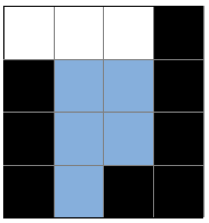|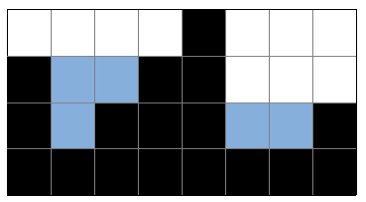|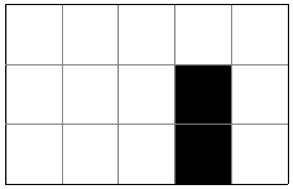|

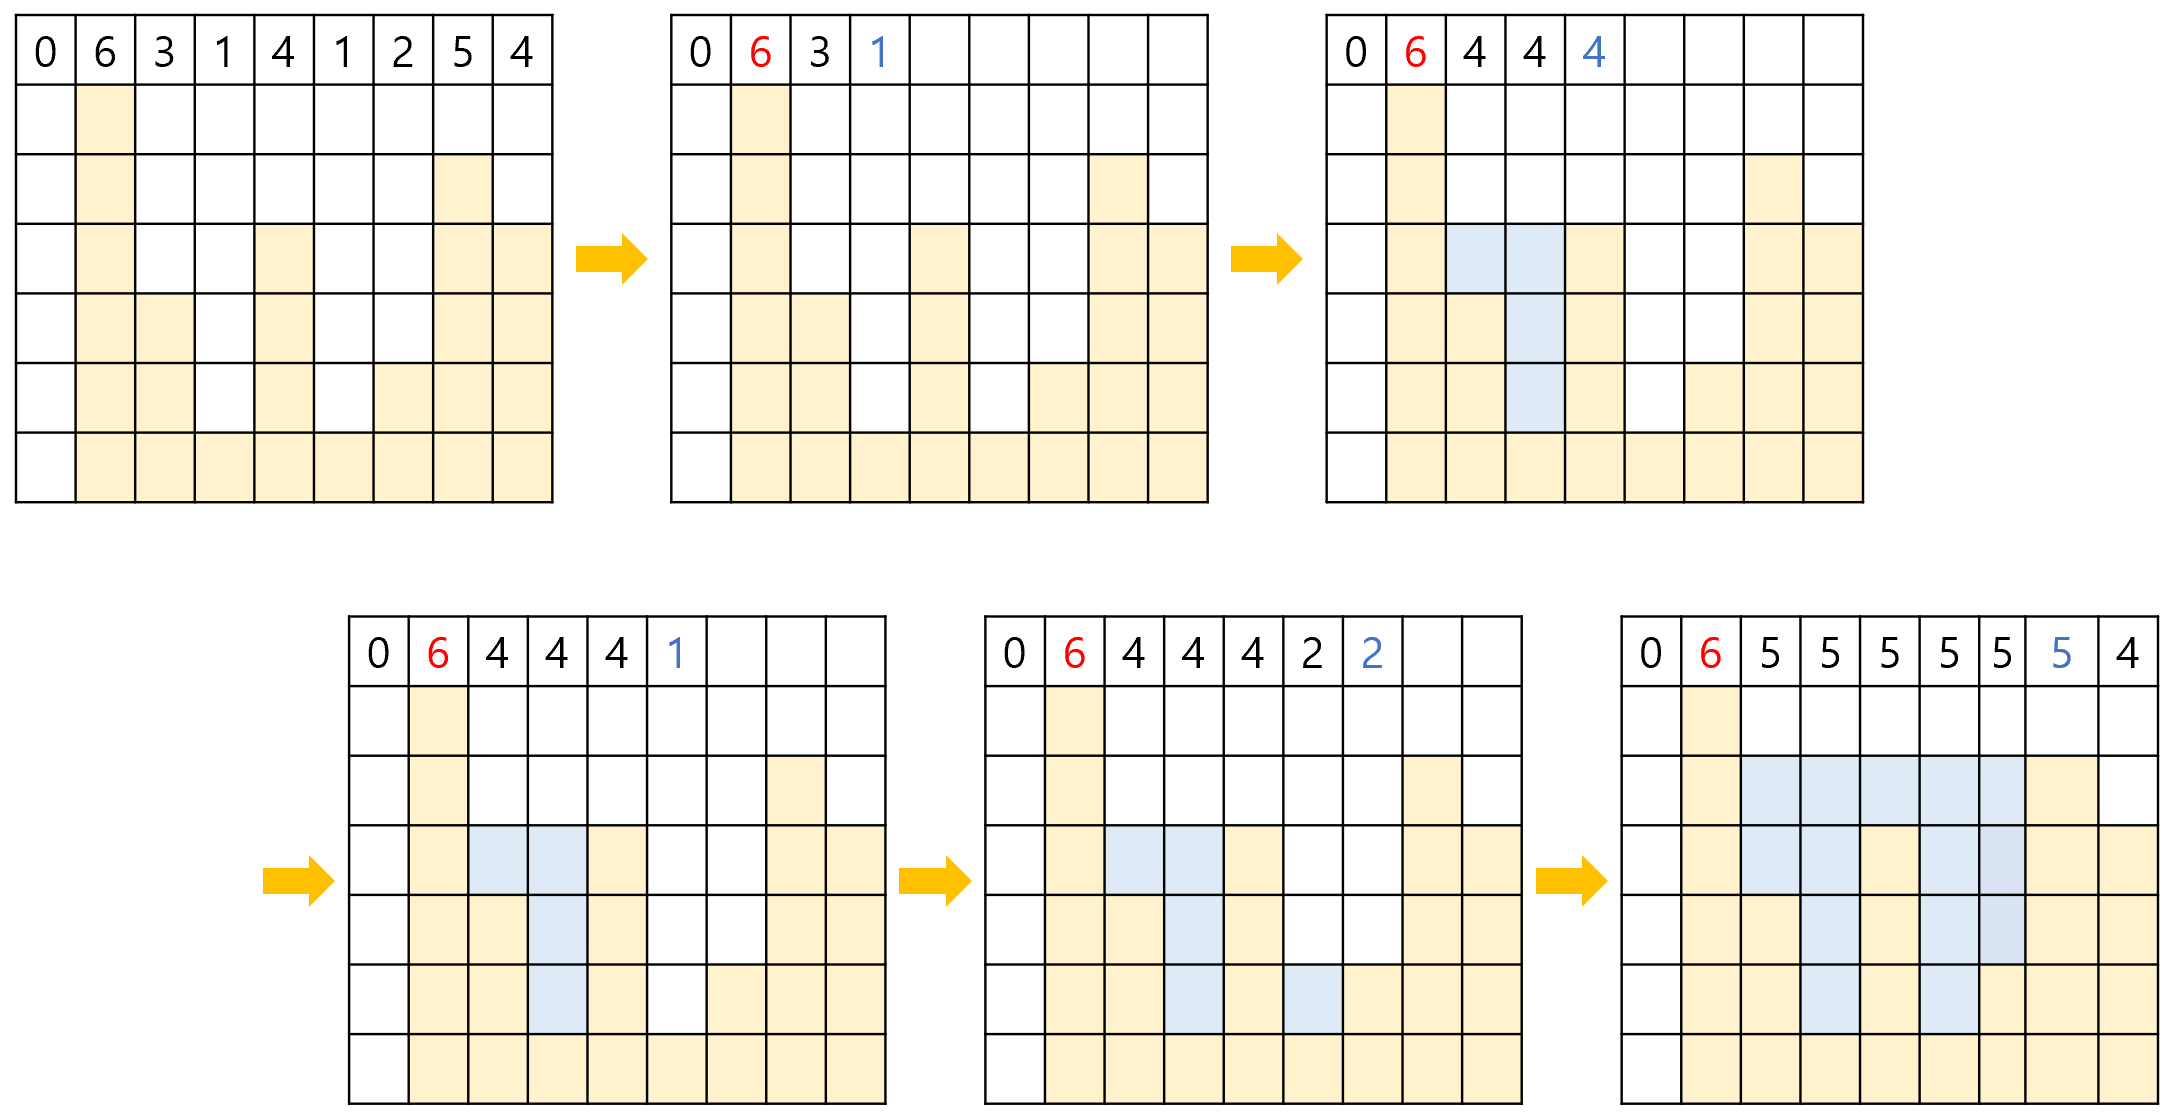

### 반례 모음
```
5 5
1 0 3 2 4
: 2

4 8
0 1 0 1 4 1 2 1
: 2

4 8
3 2 1 2 1 0 3 2
: 9

10 5
2 4 1 5 4 
: 3
```

## 코드
### 1. 양 극단의 높이차 만큼 정답에 더하기

In [ ]:
import sys
input = sys.stdin.readline

# 세로(높이) h, 가로(칸의 갯수) w
h, w = map(int, input().split())
arr = list(map(int, input().split()))

answer = 0
left = arr[0]

for i in range(1, w-1):
    now = arr[i]
    left = max(left, now)
    '''
    반복문 전에 left를 정의하는 대신, 반복하면서 매번 left 찾을 수도 있음.
    left = max(arr[:i])
    '''
    
    right = max(arr[i+1:])
    if now < left and now < right:
        answer += min(left, right) - now
        
print(answer)

### 2. 한칸씩 빗물 채우며 전진하기

In [18]:
import sys
input = sys.stdin.readline

# 세로(높이) h, 가로(칸의 갯수) w
h, w = map(int, input().split())
arr = list(map(int, input().split()))

before = sum(arr)
# answer = 0
# after = 0

a = 0
b_list = []

for c in range(1, w):
    if arr[a] <= arr[c]:
        arr[a+1:c] = [arr[a]] * (c-(a+1))
        # 초기화
        a = c
        b_list = []
        
    else: # arr[c] < arr[a] 
        for b in b_list:
            if arr[b] < arr[c]:
                arr[b:c] = [arr[c]] * (c-b)
                break
        b_list.append(c)
    '''
    확인 코드
    print(f'a: {a}, c: {c}, blist: {b_list}, arr: {arr}')
    '''             
    
after = sum(arr)
answer = after - before
print(answer)

a: 1, c: 1, blist: [], arr: [0, 1, 0, 1, 4, 1, 2, 1]
a: 1, c: 2, blist: [2], arr: [0, 1, 0, 1, 4, 1, 2, 1]
a: 3, c: 3, blist: [], arr: [0, 1, 1, 1, 4, 1, 2, 1]
a: 4, c: 4, blist: [], arr: [0, 1, 1, 1, 4, 1, 2, 1]
a: 4, c: 5, blist: [5], arr: [0, 1, 1, 1, 4, 1, 2, 1]
a: 4, c: 6, blist: [5, 6], arr: [0, 1, 1, 1, 4, 2, 2, 1]
a: 4, c: 7, blist: [5, 6, 7], arr: [0, 1, 1, 1, 4, 2, 2, 1]
2


## 결과
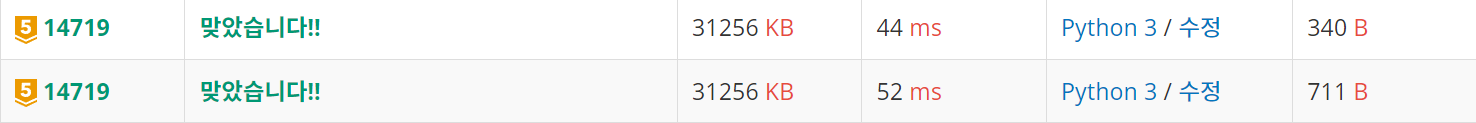